In [1]:
# Data handling
import pandas as pd
import numpy as np

# Machine Learning
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Date handling
from datetime import datetime

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings("ignore")

STEP 1- DATA COLLECTION

In [2]:
df= pd.read_csv('Coca-Cola_stock_history.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1962-01-02,0.050016,0.051378,0.050016,0.050016,806400,0.0,0
1,1962-01-03,0.049273,0.049273,0.048159,0.048902,1574400,0.0,0
2,1962-01-04,0.049026,0.049645,0.049026,0.049273,844800,0.0,0
3,1962-01-05,0.049273,0.049892,0.048035,0.048159,1420800,0.0,0
4,1962-01-08,0.047787,0.047787,0.046735,0.047664,2035200,0.0,0


In [7]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,15311.000000,15311.000000,15311.000000,15311.000000,1.531100e+04,15311.000000,15311.000000
mean,11.812883,11.906708,11.717375,11.815409,9.139213e+06,0.001678,0.001110
std,15.025726,15.133336,14.915580,15.026316,7.957947e+06,0.021302,0.049148
min,0.037154,0.037279,0.034890,0.037028,7.680000e+04,0.000000,0.000000
25%,0.238453,0.240305,0.236415,0.238312,2.889600e+06,0.000000,0.000000
50%,4.935146,4.980985,4.884242,4.937339,7.708800e+06,0.000000,0.000000
75%,17.383926,17.612844,17.168283,17.415106,1.307130e+07,0.000000,0.000000
max,66.037933,66.235058,64.776308,65.259270,1.241690e+08,0.440000,3.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15311 entries, 0 to 15310
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          15311 non-null  object 
 1   Open          15311 non-null  float64
 2   High          15311 non-null  float64
 3   Low           15311 non-null  float64
 4   Close         15311 non-null  float64
 5   Volume        15311 non-null  int64  
 6   Dividends     15311 non-null  float64
 7   Stock Splits  15311 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 957.1+ KB


In [11]:
df.duplicated().sum()

0

STEP 2- DATA CLEANING

In [13]:
df['Date'] = pd.to_datetime(df['Date'].astype(str), errors='coerce')

# Dropping rows where Date couldn't be parsed
df = df[df['Date'].notnull()]
df.sort_values('Date', inplace=True)
df.reset_index(drop=True, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6471 entries, 0 to 6470
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          6471 non-null   datetime64[ns]
 1   Open          6471 non-null   float64       
 2   High          6471 non-null   float64       
 3   Low           6471 non-null   float64       
 4   Close         6471 non-null   float64       
 5   Volume        6471 non-null   int64         
 6   Dividends     6471 non-null   float64       
 7   Stock Splits  6471 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 404.6 KB


In [17]:
# Adding moving averages
df['MA_20'] = df['Close'].rolling(window=20).mean()
df['MA_50'] = df['Close'].rolling(window=50).mean()

In [19]:
df['Daily_Return'] = df['Close'].pct_change()
df['Volatility'] = df['Daily_Return'].rolling(window=20).std()
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

STEP 3 - EXPLORATORY DATA ANALYSIS

3.1 Basic Line Plot of Closing Price

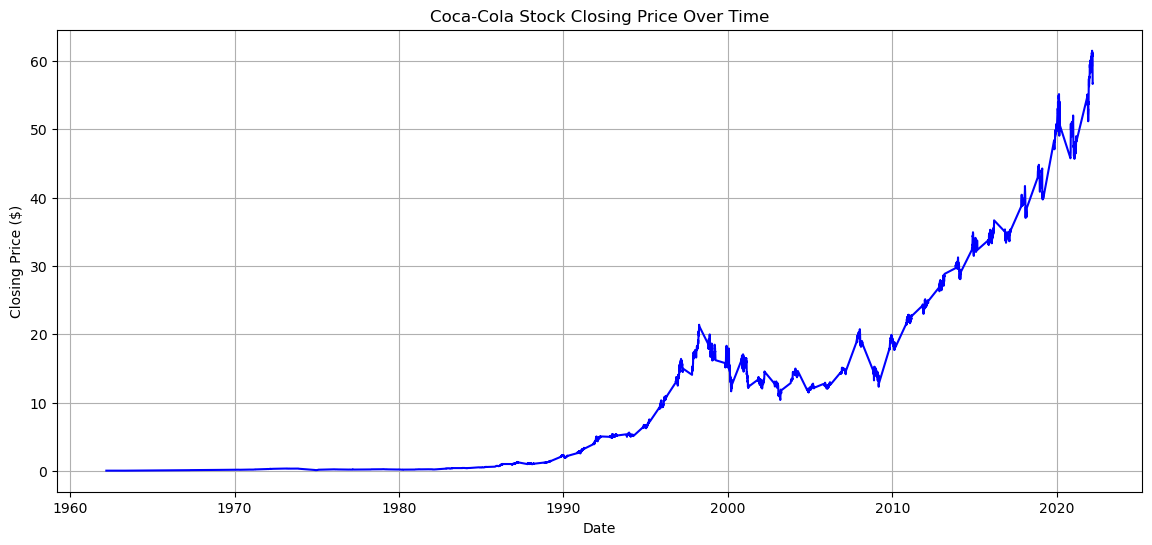

In [21]:
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], color='blue')
plt.title('Coca-Cola Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.grid(True)
plt.show()

3.2 Daily Trading Volume Over Time

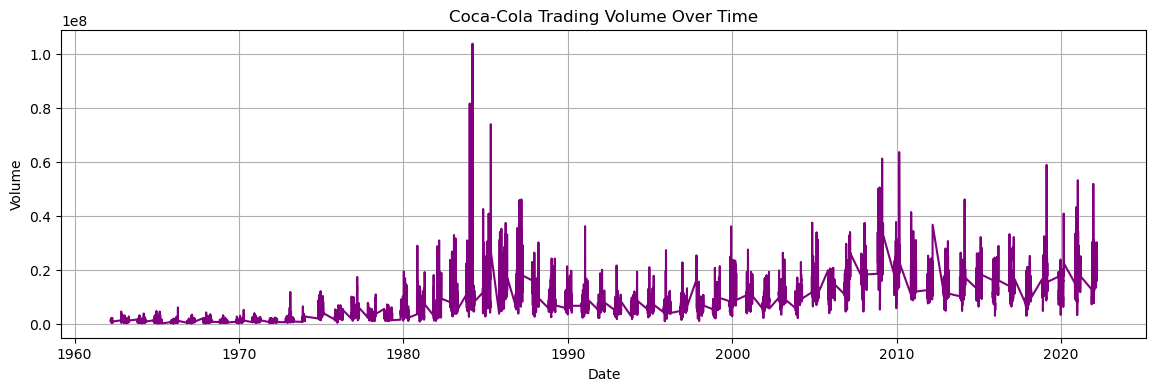

In [23]:
plt.figure(figsize=(14, 4))
plt.plot(df['Date'], df['Volume'], color='purple')
plt.title('Coca-Cola Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

3.3 Distribution of Daily Returns

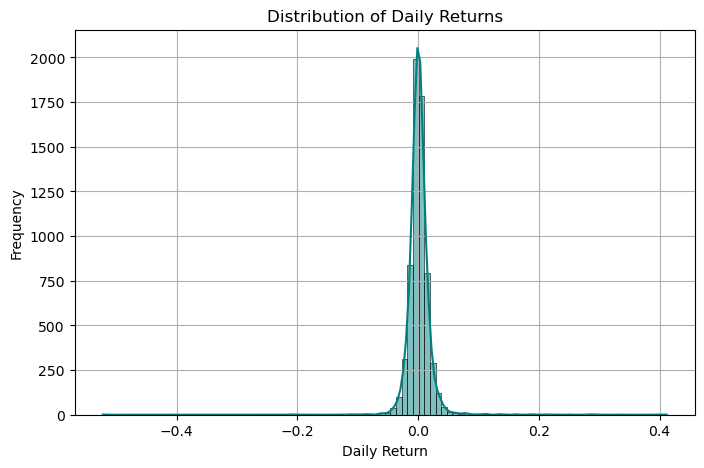

In [25]:
df['Daily_Return'] = df['Close'].pct_change()
df.dropna(inplace=True)

plt.figure(figsize=(8, 5))
sns.histplot(df['Daily_Return'], bins=100, kde=True, color='teal')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

3.4 Moving Averages Comparison

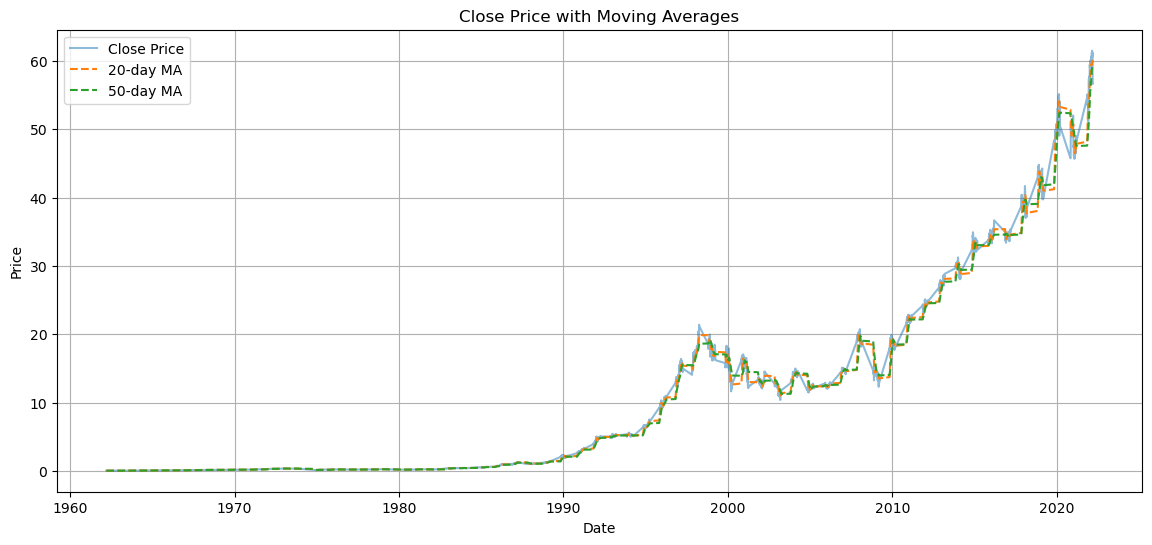

In [27]:
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', alpha=0.5)
plt.plot(df['Date'], df['MA_20'], label='20-day MA', linestyle='--')
plt.plot(df['Date'], df['MA_50'], label='50-day MA', linestyle='--')
plt.title('Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

3.5 Rolling Volatility

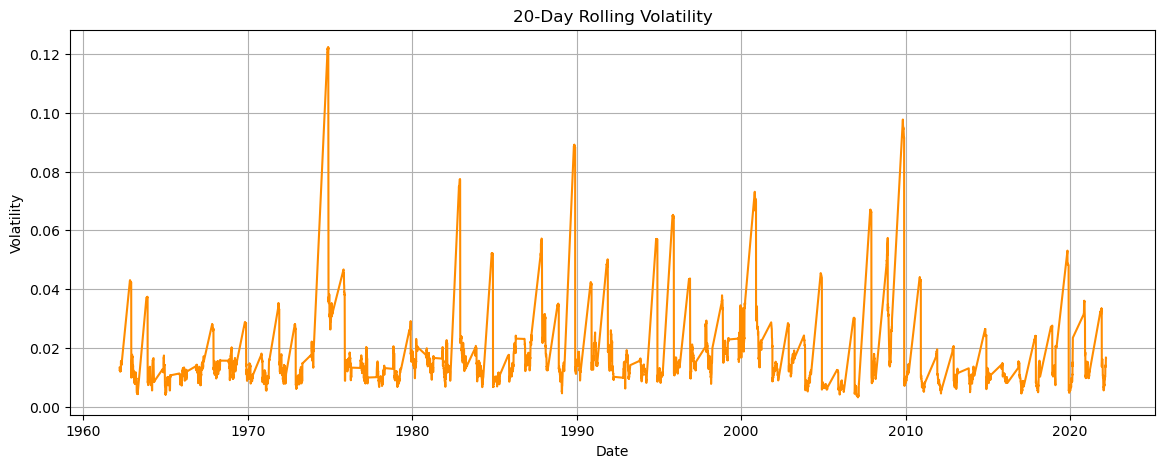

In [29]:
plt.figure(figsize=(14, 5))
plt.plot(df['Date'], df['Volatility'], color='darkorange')
plt.title('20-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()

3.6- Monthly Seasonality Heatmap

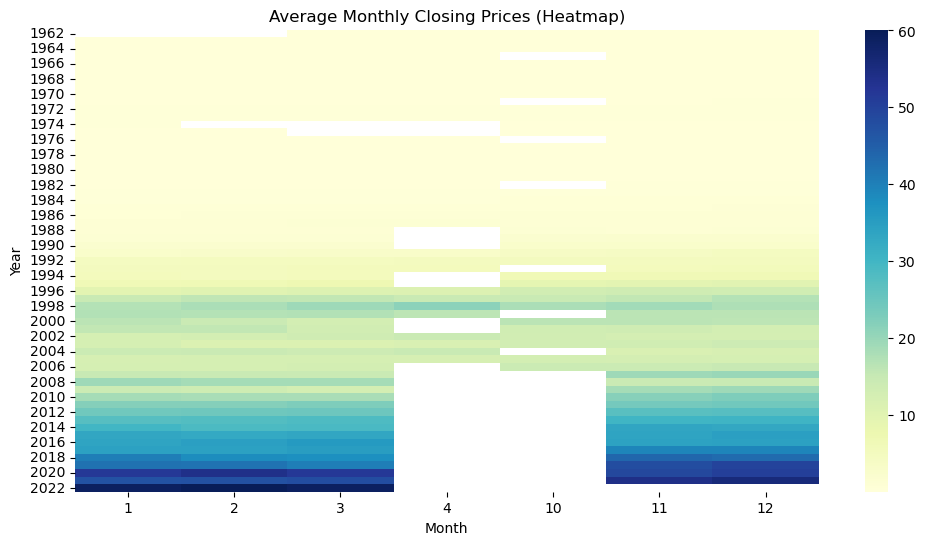

In [31]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
monthly_avg = df.groupby(['Year', 'Month'])['Close'].mean().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(monthly_avg, cmap='YlGnBu')
plt.title('Average Monthly Closing Prices (Heatmap)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

3.7  Correlation Matrix

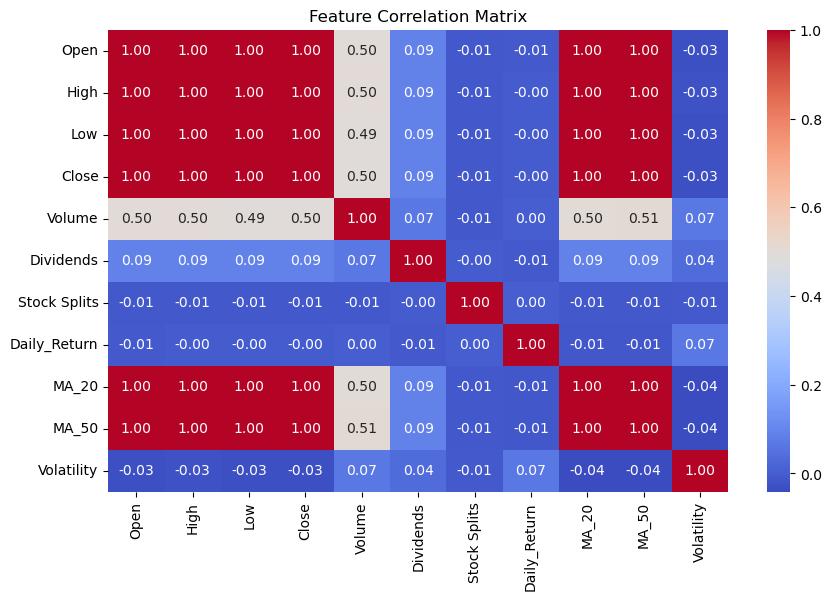

In [33]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[[
    'Open', 'High', 'Low', 'Close', 'Volume', 
    'Dividends', 'Stock Splits', 'Daily_Return', 
    'MA_20', 'MA_50', 'Volatility'
]].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

STEP 4: FEATURE ENGINEERING

In [35]:
df['MA_20'] = df['Close'].rolling(window=20).mean()
df['MA_50'] = df['Close'].rolling(window=50).mean()
df['Daily_Return'] = df['Close'].pct_change()
df['Volatility'] = df['Daily_Return'].rolling(window=20).std()

# Dropping rows with NaN caused by rolling windows
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

STEP 5- MODEL TRAINING

In [37]:
# Defining features and target
features = ['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits', 'MA_20', 'MA_50', 'Daily_Return', 'Volatility']
target = 'Close'

X = df[features]
y = df[target]

# Train-test split (no shuffle because time series)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

# Training the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicting on full dataset
df['Prediction'] = model.predict(X)

In [38]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Test MSE: {mse:.4f}")
print(f"Test MAE: {mae:.4f}")

Test MSE: 297.2508
Test MAE: 12.9260


STEP 6- BUY AND HOLD VS MACHINE LEARNING BASED STRATEGY SIMULATION

In [41]:
df['Prediction'] = model.predict(X)

In [43]:
# Initializing capital and tracking
initial_investment = 10000
cash = initial_investment
shares = 0
portfolio_value = []

# Creating buy/sell signals
df['Signal'] = 0
df['Signal'][1:] = np.where(df['Prediction'][1:].values > df['Close'][:-1].values, 1, -1)

# Tracking holding status
holding = False

for i in range(len(df)):
    price = df['Close'].iloc[i]
    signal = df['Signal'].iloc[i]

    # BUY
    if signal == 1 and not holding:
        shares = cash / price
        cash = 0
        holding = True

    # SELL
    elif signal == -1 and holding:
        cash = shares * price
        shares = 0
        holding = False

    # Portfolio value = cash + value of current shares
    total_value = cash + (shares * price)
    portfolio_value.append(total_value)

df['MLStrategy_Value'] = portfolio_value

In [49]:
# Buy & Hold strategy
df['BuyHold_Value'] = (df['Close'] / df['Close'].iloc[0]) * initial_investment

# ML Strategy portfolio value
df['MLStrategy_Value'] = df['Signal'].shift(1).cumsum().fillna(0)
df['MLStrategy_Value'] = (1 + df['Signal'].shift(1).fillna(0) * df['Daily_Return']).cumprod() * initial_investment

STEP 7- COMPARISON USING PLOT

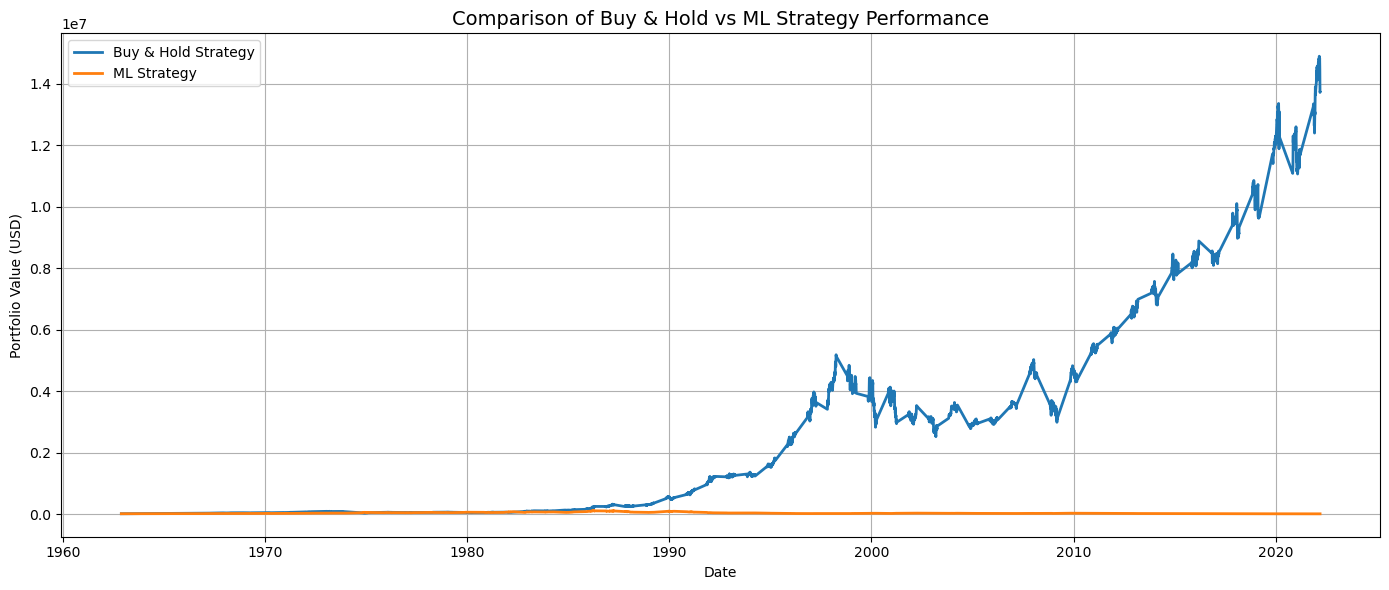

In [51]:
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['BuyHold_Value'], label='Buy & Hold Strategy', linewidth=2)
plt.plot(df['Date'], df['MLStrategy_Value'], label='ML Strategy', linewidth=2)

plt.title('Comparison of Buy & Hold vs ML Strategy Performance', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Portfolio Value (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

STEP 8- FINAL PERFORMANCE

In [53]:
df['BuyHold_Value'] = df['Close'] / df['Close'].iloc[0] * initial_investment

final_bh = df['BuyHold_Value'].iloc[-1]
final_ml = df['MLStrategy_Value'].iloc[-1]

print(f"Final Value (Buy & Hold): ${final_bh:.2f}")
print(f"Final Value (ML Strategy): ${final_ml:.2f}")
print(f"Difference: ${final_ml - final_bh:.2f}")

Final Value (Buy & Hold): $13726542.31
Final Value (ML Strategy): $6999.95
Difference: $-13719542.36


STEP 9- CONCLUSION

The ML model predicted prices decently, but did not translate to better financial returns. Buy & Hold was more effective for Coca-Cola. We also learned the difference between accuracy in prediction vs profitability in strategy.
